## Homework for Class 16
Determine how to see if a set of 20 dice roles is likely made up, or really random

In [1]:
import numpy as np
import random as rnd
import scipy.stats as ss
import matplotlib.pyplot as plt


In [2]:
def ChiSquared(TestVector, Expected):
    a = np.size(TestVector)

    GoodnessOfFit = 0
    for i in range(a):
        GoodnessOfFit += ((RandomResults[i] - Expected)**2 / Expected)

    return ss.chi2.cdf(GoodnessOfFit, a)


In [3]:
rolls = 20
Trials = 10000
Results = []

Expected = (1+2+3+4+5+6) / 6.0
StdDev = ((Expected - 1)**2 + \
    (Expected - 2)**2 + (Expected - 3)**2 + (Expected - 4)**2 \
        + (Expected - 5)**2 + (Expected - 6)**2)/Expected

for j in range(Trials):
    RandomResults= np.zeros(rolls)

    for i in range(rolls):
        RandomResults[i] = rnd.randint(1,6)

    Prob = ChiSquared(RandomResults, Expected)
    Results.append(Prob)

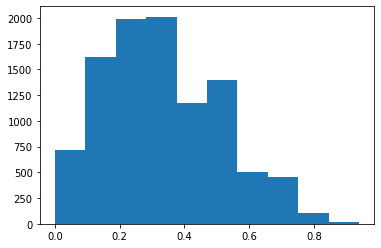

In [4]:
fig=plt.figure()
plt.hist(Results,10)
plt.show()

In [7]:
MadeUpResults = np.ones(rolls)*6
Prob = ChiSquared(MadeUpResults, Expected)

print(Prob)

Smaller = 0
for i in range(Trials):
    if Results[i] < Prob: Smaller+=1

print(Smaller / Trials)        

0.3377704568018516
0.5537
